# PROBLEM STATEMENT

Course-End Project: Healthcare

Problem statement: Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health.

Dataset description:

Variable Description 
Age: Age in years 
Sex 1 = male; 0 = female 
cp| Chest pain type
trestbps Resting blood pressure (in mm Hg on admission to the hospital) 
chol Serum cholesterol in mg/dl 
fbs Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
restecg Resting electrocardiographic results 
thalach Maximum heart rate achieved 
exang Exercise induced angina (1 = yes; 0 = no) 
oldpeak ST depression induced by exercise relative to rest 
slope: Slope of the peak exercise ST segment
ca Number of major vessels (0-3) colored by fluoroscopy 
thal 3 = normal; 6 = fixed defect; 7 = reversible defect 
Target 1 or 0

Note:

Download CEP 1_ Dataset.xlsx using the link given in the Healthcare project problem statement

Task to be performed:

Preliminary analysis:
a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

c. Study the occurrence of CVD across the Age category

d. Study the composition of all patients with respect to the Sex category

e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

f. Describe the relationship between cholesterol levels and a target variable

g. State what relationship exists between peak exercising and the occurrence of a heart attack

h. Check if thalassemia is a major cause of CVD

i. List how the other factors determine the occurrence of CVD

j. Use a pair plot to understand the relationship between all the given variables

Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

# Importing Important Libraries for Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
#Reading dataset
CVD = pd.read_excel('1645792390_cep1_dataset.xlsx')

# 1. Preliminary analysis:¶

In [3]:
#Previewing the head of the dataset
CVD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Previewing the tail of the dataset
CVD.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# checking the shape of the dataset

In [5]:
#Checking the shape of our dataset
CVD.shape

(303, 14)

# Checking for missing values in our dataset

In [6]:
#checking for missing values in our dataset
CVD.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The above null value check output indicates that there are no missing values in our dataset.

# Percentage calculation for missing value

In [7]:
#Percentage computation of null values

CVD.isnull().mean()*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

## Looking up the information about our dataset

In [8]:
#Dataset information
CVD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The information indicates that there are 13 integers and 1 float data type

# checking for duplicate value in our dataset

In [9]:
#Duplicate value check
Duplicate_values = CVD.duplicated().sum()
Duplicate_values

1

It appears that there is one duplicate data in the dataset.

In [10]:
CVD.duplicated().value_counts().reset_index()

,index,0
0,False,302
1,True,1


We have 302 non-duplicate values and 1 duplicate value. 

# Viewing all columns in the dataset

In [11]:
#Dataset features
all_columns = CVD.columns
all_columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Locating the duplicate data in the dataset

In [12]:
duplicated = CVD[CVD.duplicated(subset= all_columns, keep = False)]
duplicated

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Looking at the output we can clearly see that index 163 and 164 are duplicate.

# 1.b Removing Duplicate Values from the Dataset

In [13]:
#dropping duplicate
CVD.drop(index = 164, inplace=True)

Duplicate data can lead to inaccurate and misleading analysis results. By removing duplicates, 
the quality and accuracy of the dataset increases. It also helps to reduce bias in our model.

In [14]:
#Rechecking the dataset to see if the duplicate has been dropped.
CVD.shape

(302, 14)

The columns has reduced from 303 to 302, indicating that one duplicate has been dropped.

# Preliminary Statistical Summary of the Data

In [15]:
#Understanding the dispersion of the data
CVD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Report of the Distribution of the Disease.
From the above table.

This summary offers valuable insights into the dataset's central tendency, spread, and distribution, which are vital when delving into datasets and comprehending their characteristics.

Examining the table above, the count indicates uniform entry across all features. When analyzing the distributions of mean values across the features, it's apparent that the central tendency of 'chol', 'thalach', 'trestbps', and 'age' can be attributed to the range of values within these columns. This range of values contributes to their distinct central tendencies compared to the remaining columns. In terms of the dispersion of data points from the mean, it's notable that, apart from the aforementioned features, other columns exhibit high dispersion in their standard deviations, indicating a notable presence of outliers.

The minimum and maximum values within each feature are directly associated with the mean values. Furthermore, the 25th, 50th, and 75th percentiles provide valuable insights. The 25th percentile (Q1) illustrates the range below which 25% of the data falls, the 50th percentile is the median (Q2) or the middle value of the data, and the 75th percentile (Q3) indicates the range below which 75% of the data falls.

In [16]:
#Extracting the median from the above table for clarity.
Median_Values = CVD.median()
MV= pd.DataFrame(Median_Values).reset_index()
MV= MV.rename(columns={'index':'features', 0:'median'})

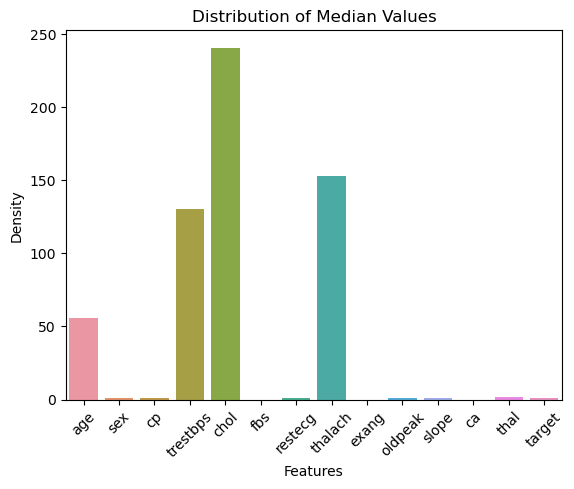

In [17]:
#importing seaborn's plot
sns.barplot(x='features', y ='median', data=MV)
plt.title('Distribution of Median Values')
plt.xlabel('Features')  # Change x-axis label to 'Features'
plt.ylabel('Density')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

We can deduce that the majority of feature median values are concentrated around 0, which significantly contributes to the occurrence of outliers in our dataset. Given the dataset's asymmetrical distribution and the presence of outliers, it becomes crucial to explore alternative measures of central tendency. This exploration aims to identify the factors that are exerting influence on the dataset.

In [18]:
#Extracting the mean from the above table for understanding and clarity.
Mean_Cvd = CVD.mean()
M_CVD = Mean_Cvd.reset_index().rename(columns={'index':'features', 0:'Mean'})

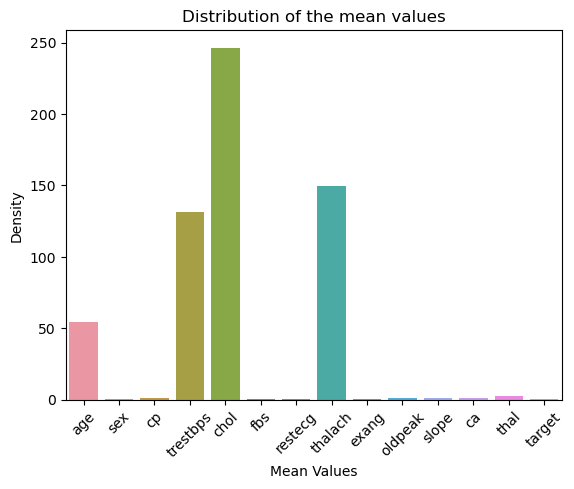

In [19]:
#Visualizing the mean distribution of the features
sns.barplot(data=M_CVD, x='features', y='Mean')

plt.title('Distribution of the mean values')
plt.xlabel('Mean Values')
plt.ylabel('Density')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

We can infer that the mean values for 'chol', 'thalach', 'trestbps', and 'age' are distinctive, while most of the features are clustered at 0.

## Visualizing Outliers

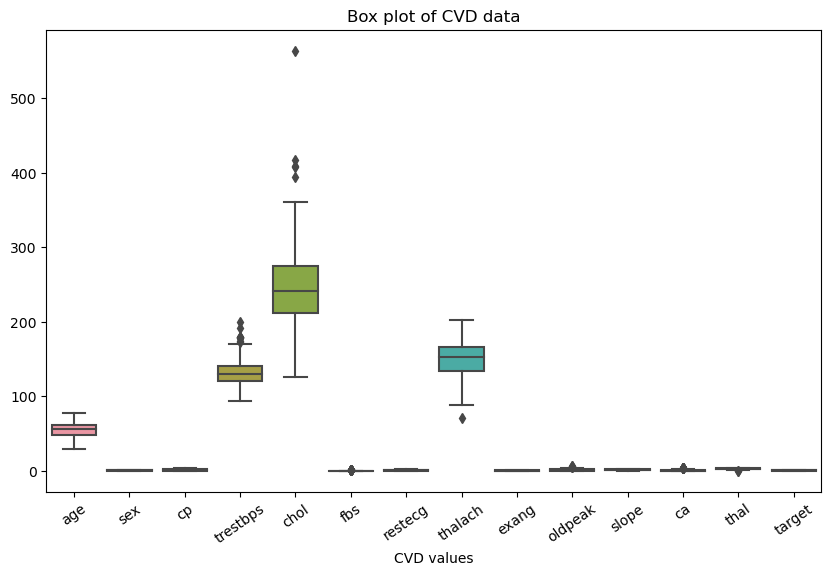

In [20]:
#Using boxplot to visualise outliers

plt.figure(figsize=(10,6))

sns.boxplot(data=CVD)

plt.title('Box plot of CVD data')

plt.xlabel('CVD values')

plt.xticks(rotation=35)

plt.show()

Based on the plot shown above, we can deduce that age and thalach exhibit a negative skewness, however the age feature has no outliers. This indicates that most data points are concentrated around higher values, with a few smaller values extending the distribution's left tail. Additionally, the features chol, thalach, fbs, oldpeak, ca, thal, and trestbps suggest the existence of outliers within the dataset.

However, due to the sensitive nature of our data, we have chosen not to scale the dataset or address the presence of outliers. In line with this decision, we will be utilizing the Random Forest Algorithm for deployment, as it is not influenced by the presence of outliers.

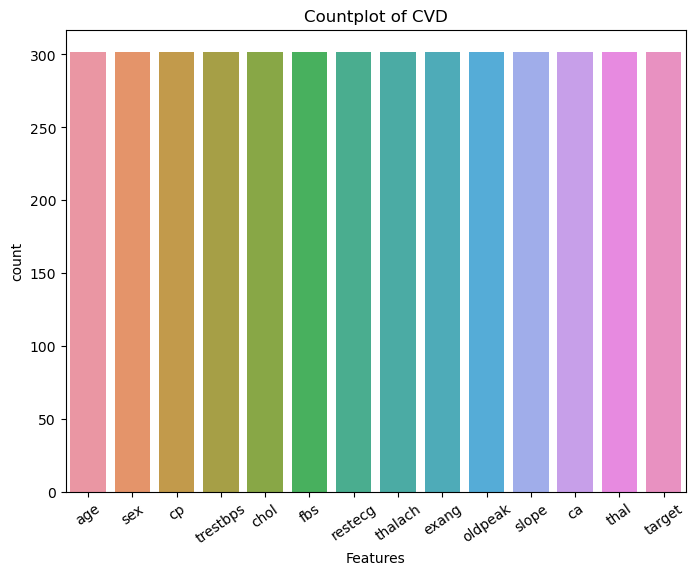

In [21]:
#Visualizing data completeness

plt.figure(figsize= (8, 6))

sns.countplot(data=CVD)

plt.title('Countplot of CVD')
plt.xlabel('Features')
plt.ylabel('count')

plt.xticks(rotation=35)

plt.show()

We can infer from the above plot that the features in our dataset are in uniformity.

In [22]:
#checking the dependent variable completeness

CVD['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

### 1b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

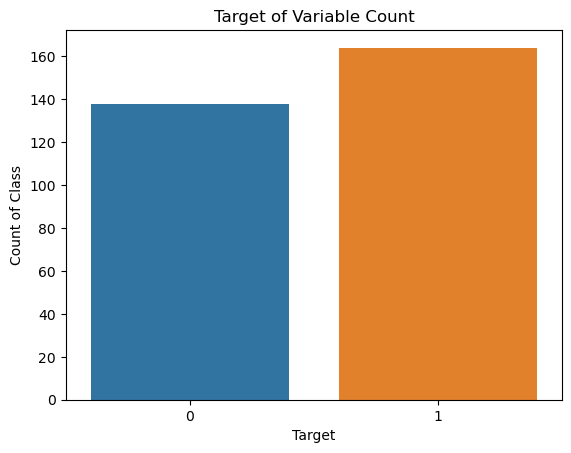

In [23]:
#countplot visual representation of target category

sns.countplot(x='target', data=CVD)
plt.xlabel('Target')
plt.ylabel('Count of Class')
plt.title('Target of Variable Count')

plt.show()

From the above plot we can infer that the number of patient with CVD in our dataset is higher.

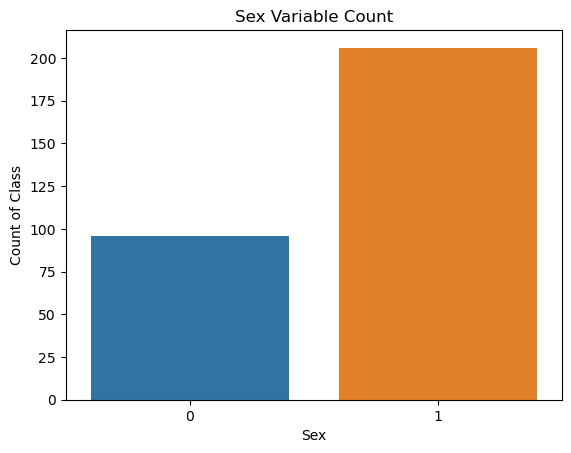

In [24]:
#countplot visual representation of sex 

sns.countplot(x='sex', data=CVD)
plt.xlabel('Sex')
plt.ylabel('Count of Class')
plt.title('Sex Variable Count')

plt.show()

We can infer that the total number of male patient is higher.

Age in years Sex 1 = male; 0 = female

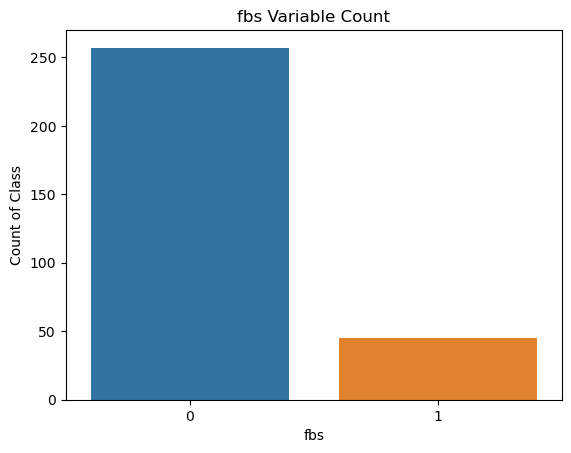

In [25]:
#countplot visual representation of fbs 

sns.countplot(x='fbs', data=CVD)
plt.xlabel('fbs')
plt.ylabel('Count of Class')
plt.title('fbs Variable Count')

plt.show()

Patients within normal fasting blood sugar are higher.

fbs Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 

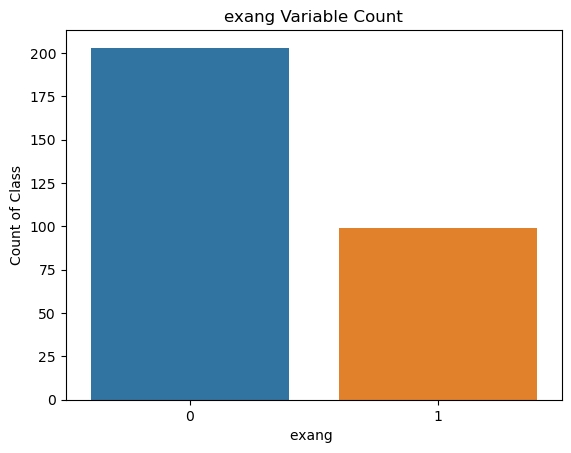

In [26]:
#countplot visual representation of Exercise induced angina 

sns.countplot(x='exang', data=CVD)
plt.xlabel('exang ')
plt.ylabel('Count of Class')
plt.title('exang Variable Count')

plt.show()

Exercise-induced angina, is a medical condition characterized by chest painor discomfort that occurs during 
physical activity or exertion. Patient without angina as observed is higher.
`
Exercise induced angina (1 = yes; 0 = no)

In [27]:
#Identify the data variables which are categorical 
CVD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Our dataset contains integers and float. 

## 1c.  Occurrence of CVD across the Age Category

In [28]:
Age_ = CVD['age'].sort_values()
Age_.head()

72     29
58     34
125    34
239    35
65     35
Name: age, dtype: int64

Text(0.5, 1.0, 'Occurence of CVD across Age\n')

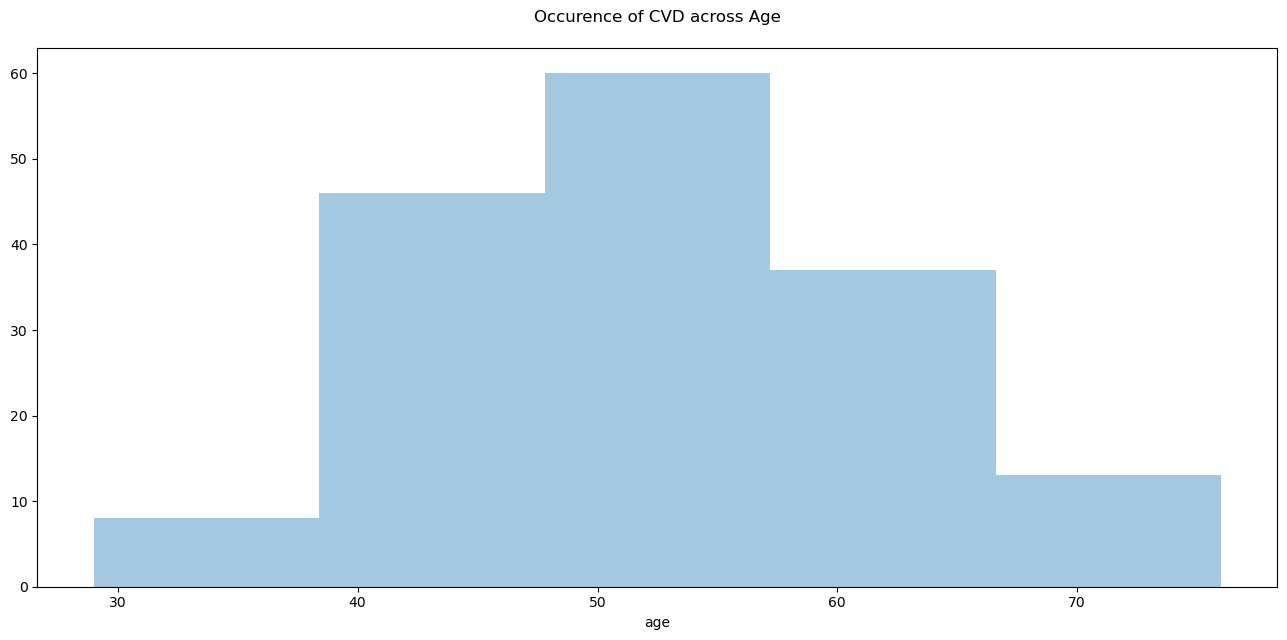

In [29]:
#Importing seaborn's distplot
plt.figure(figsize=(16,7))

sns.distplot(CVD[CVD['target']==1]['age'],kde=False,bins=5)

plt.title('Occurence of CVD across Age\n')

Based on the plot above we can infer that from age 29 to 77 had CVD. However, heart 
disease in our dataset is more prevalent in patient from age 40 to age 65.

### 1d. Study the composition of all patients with respect to the Sex category

In [30]:
Total_No_of_Male = (CVD['sex'] == 1).sum()
Total_No_of_Male

206

This was necessary to understand the distribution of CVD among patients.

In [31]:
Total_No_of_Female = (CVD['sex'] == 0).sum()
Total_No_of_Female

96

Text(0.5, 1.0, 'Gender v/s target\n')

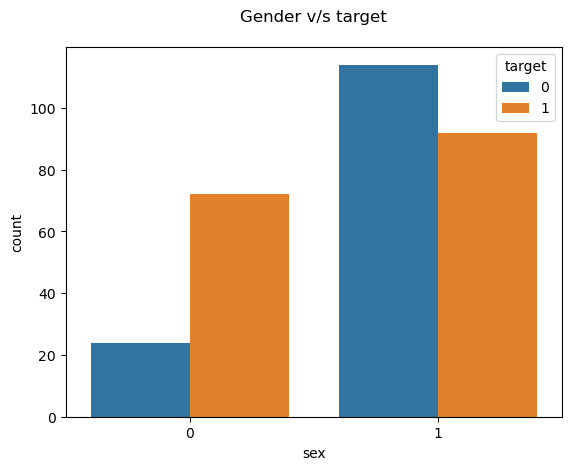

In [32]:
#Importing seaborn's countplot
sns.countplot(data= CVD, x='sex',hue='target')

plt.title('Gender v/s target\n')

The above plot signifies that there is high prevalence of CVD among male patient.

This was done to undertand the distribution of CVD across the sexes.

### 1e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

Text(0.5, 1.0, 'Heart Attack based on Resting Blood pressure')

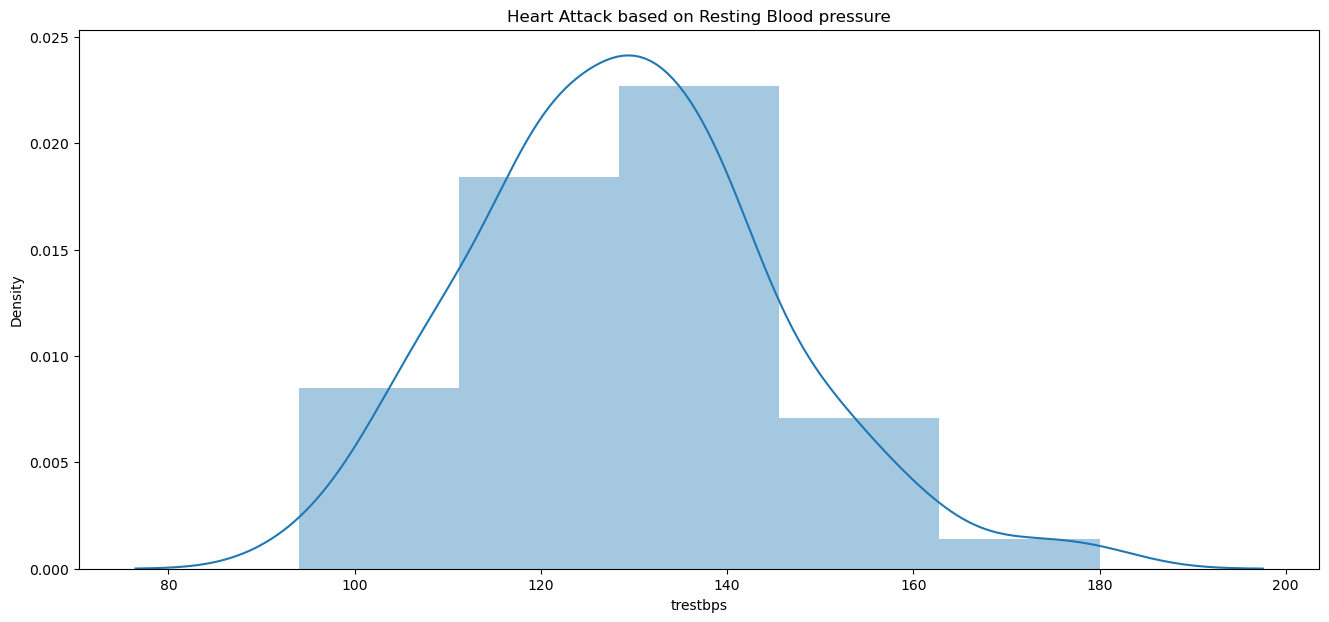

In [33]:
#Importing seaborn's plot
plt.figure(figsize=(16,7))

sns.distplot(CVD[CVD['target']==1]['trestbps'],kde=True,bins=5)

plt.title('Heart Attack based on Resting Blood pressure')

From the above plot we can infer that patient with normal blood pressure also had heart attack, this is could
be due to other underlining heart diseases. 

ideal blood pressure is considered to be 120/80mmHg

high blood pressure is considered to be 140/90mmHg or higher

low blood pressure is considered to be below 90/60mmHg

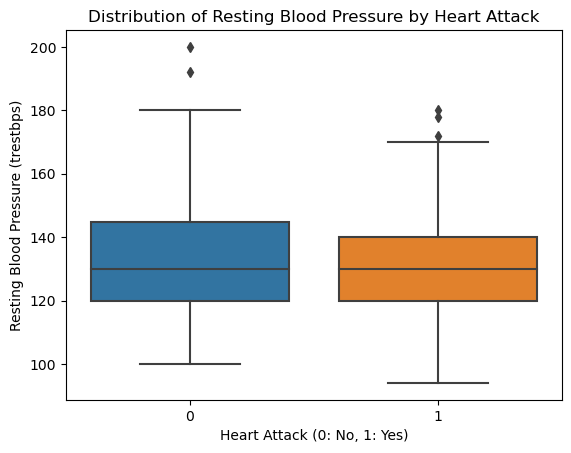

In [34]:
#Importing seaborn's plot
sns.boxplot(x='target', y='trestbps', data=CVD)
plt.xlabel('Heart Attack (0: No, 1: Yes)')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.title('Distribution of Resting Blood Pressure by Heart Attack')
plt.show()

From this plot we observe that on average patient who had heart attack had a resting blood pressure score between 130 mm Hg to 140 mm Hg. However those without heart attack also had high resting blood pressure.

As a general guide: ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. high blood pressure is considered to be 140/90mmHg or higher. low blood pressure is considered to be below 90/60mmHg.


We could also infer that the outliers were due to extreme values that do not conform to the overall data distribution.

### 1f. Describe the relationship between cholesterol levels and a target variable

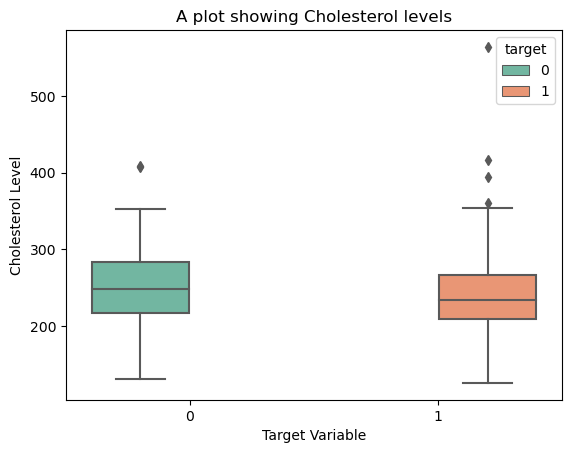

In [35]:
#Importing seaborn's plot
sns.boxplot(data=CVD, x='target', y='chol', hue='target', palette='Set2')

plt.title('A plot showing Cholesterol levels')
plt.xlabel('Target Variable')
plt.ylabel('Cholesterol Level')

plt.show()

In adults, ideal total cholesterol levels are below 200 mg/dL. Levels between 200-239 mg/dL are borderline high, and 240 mg/dL and above are considered high. 
For LDL cholesterol, less than 100 mg/dL is recommended for those without health issues; 
this target may vary for those with heart problems or risk factors.
LDL levels are categorized as borderline moderate (130-159 mg/dL), moderate (160-189 mg/dL), or very high (190 mg/dL and above). 
Maintaining higher HDL levels is important; less than 40 mg/dL is a cardiovascular disease risk, while borderline low levels range from 41-59 mg/dL. 
The highest HDL level should not exceed 60 mg/dL.

### 1g. State what relationship exists between peak exercising and the occurrence of a heart attack

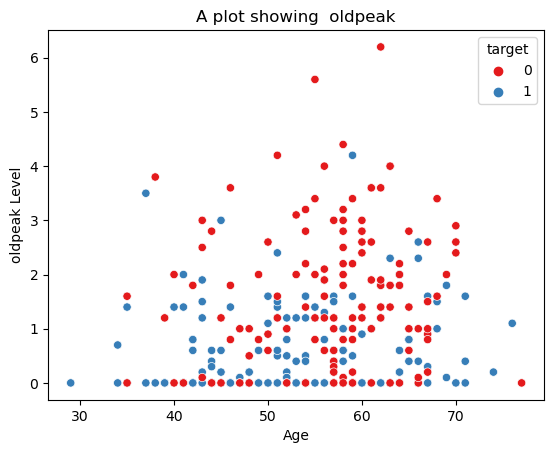

In [36]:
#Importing seaborn's plot
sns.scatterplot(data=CVD, x='age', y='oldpeak', hue='target', palette='Set1')

plt.title('A plot showing  oldpeak')
plt.xlabel('Age')
plt.ylabel('oldpeak Level')

plt.show()


Those who had high peak exercising rate had low chances of developing heart attack regardless of age.


Note:

Oldpeak ST depression " indicates the amount of ST depression relative to baseline(rest)
and the "slope" refers to the pattern of ST segment changes during peak exercise.
These ECG findings help clinicians evaluate the presence and severity of cardaic abnormalities, particularly
ischemia, which can have implications for diagnosing and managing heart conditions.

### 1h. Check if thalassemia is a major cause of CVD

Text(0.5, 1.0, 'A plot of Thalassemia')

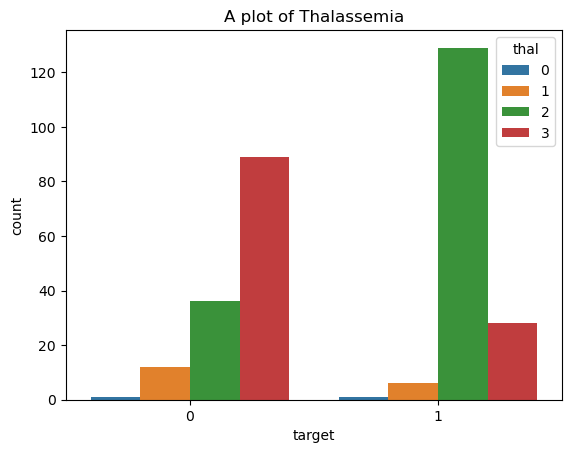

In [37]:
#Importing seaborn's plot

sns.countplot(data=CVD, x='target', hue='thal')

plt.title('A plot of Thalassemia')


Thalassemia itself, whether alpha or beta thalassemia, does not directly cause cardiovascular disease (CVD). 
However, we can infer that individuals that had heart attack and those who didn't all had thalassemia. 
here are two main types of thalassemia, alpha thalassemia and beta thalassemia, and within these types, there are various subtypes or classes, each with its level of severity and complication.

Thalassemia is a group of inherited blood disorders characterized by abnormal hemoglobin production.
The level of complication in thalassemia depends on the specific subtype and the individual's overall health.

### 1i. List how the other factors determine the occurrence of CVD

Here are several factors that can trigger or contribute to a heart attack in an individual, and these factors are not exhaustive.

Age (age): CVD risk increases with age, and older individuals are more prone to heart-related issues.
    
Gender (sex): Men and women may have different risk profiles for CVD, with certain factors affecting one gender more than the other.    

Genetics (cp, ca, thal): Family history of CVD can increase an individual's risk, as there may be genetic predispositions. The attributes 'cp,' 'ca,' and 'thal' could be related to genetic factors.

Hypertension (High Blood Pressure) (trestbps): Elevated blood pressure is a significant risk factor for CVD. The attribute 'trestbps' is associated with blood pressure.

High Cholesterol Levels (chol): High levels of LDL (low-density lipoprotein) cholesterol are associated with an increased risk of CVD. The attribute 'chol' represents cholesterol levels.

Smoking (smoking): Smoking tobacco products is a major risk factor for heart disease. Although 'smoking' is not listed in the provided attributes, it can be a relevant factor.

Diabetes (fbs): Individuals with diabetes are at higher risk of developing CVD. The attribute 'fbs' may relate to diabetes.

Obesity (body weight): Excess body weight, particularly abdominal obesity, is linked to CVD. While 'body weight' is not listed in the provided attributes, it can be a relevant factor.

Obesity (body weight): Excess body weight, particularly abdominal obesity, is linked to CVD. While 'body weight' is not listed in the provided attributes, it can be a relevant factor.

Physical Inactivity (exang): Lack of regular physical activity is associated with an increased risk of heart disease. The attribute 'exang' could be related to physical activity.

Unhealthy Diet (slope): Diets high in saturated fats, trans fats, salt, and added sugars can contribute to CVD. The attribute 'slope' may relate to diet patterns.

Stress (oldpeak): Chronic stress and poor stress management may impact heart health. The attribute 'oldpeak' could be linked to stress levels.

Alcohol Consumption (thalach): Excessive alcohol intake can lead to heart problems. The attribute 'thalach' may be associated with alcohol consumption.

Environmental Factors: Air pollution, exposure to secondhand smoke, and other environmental factors can influence CVD risk. These factors are not directly represented in the provided attributes but are important environmental considerations.

### 1j. Use a pair plot to understand the relationship between all the given variables

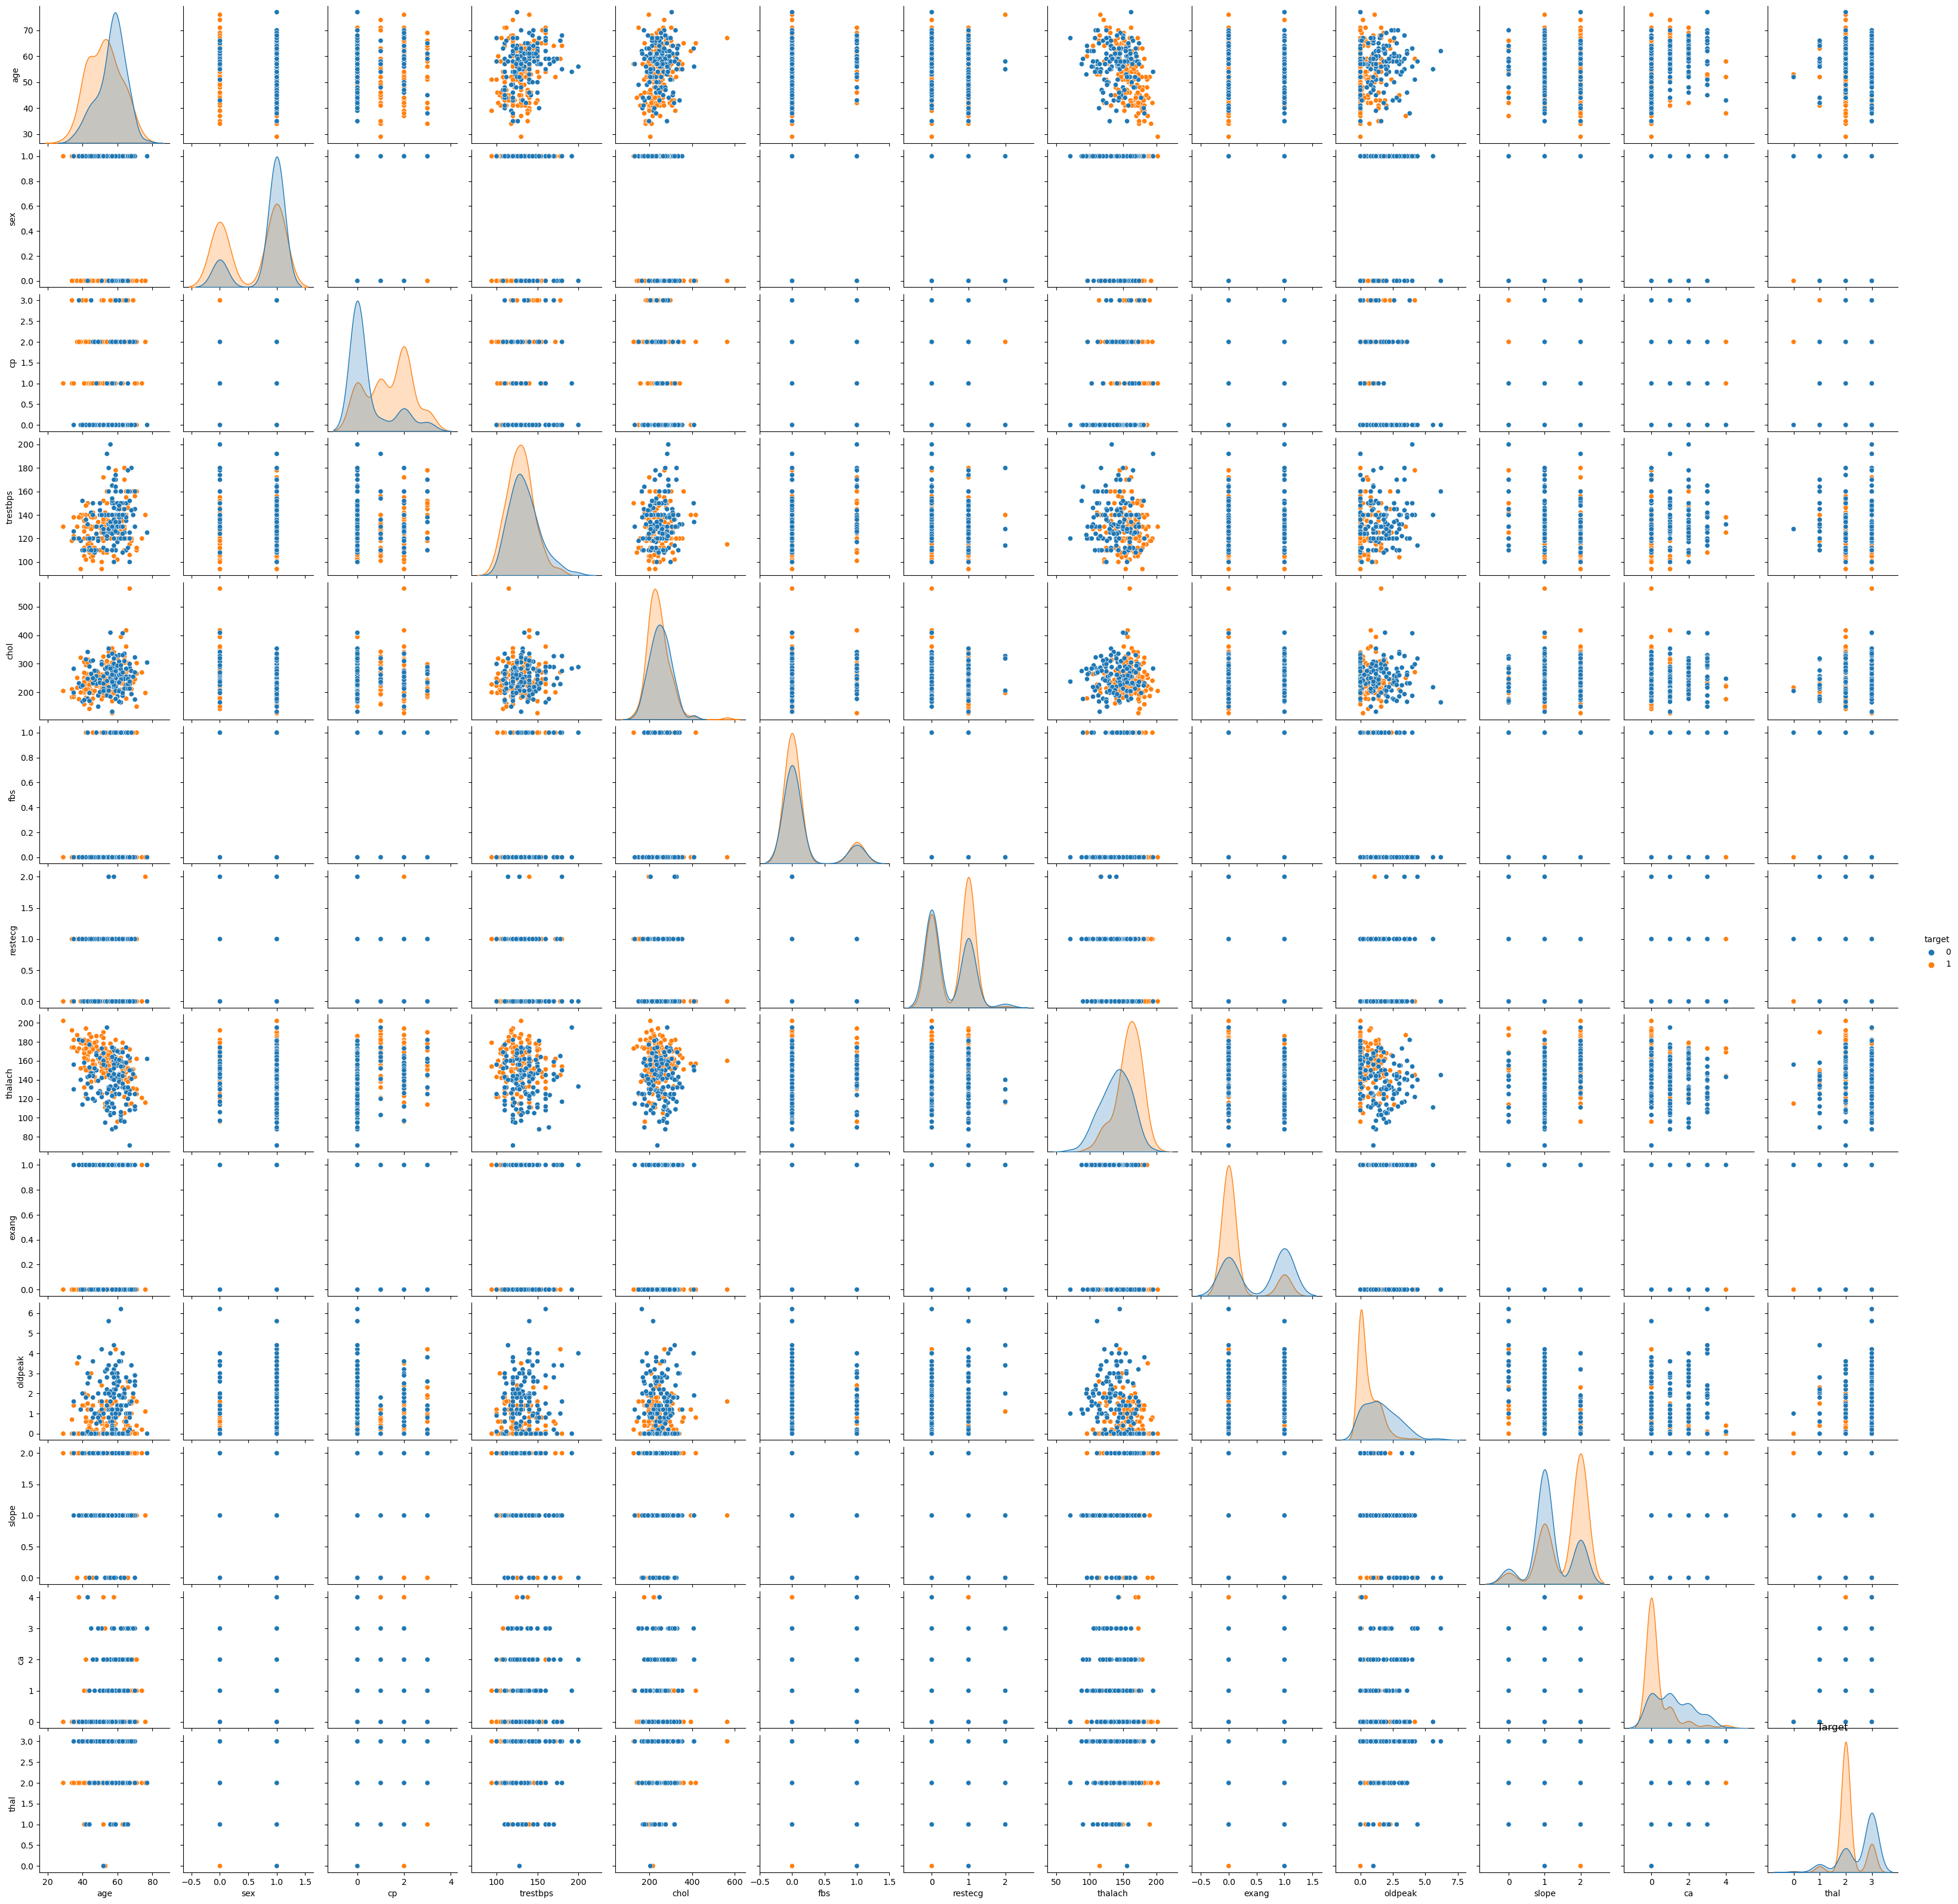

In [38]:
#Using Seaborn to visualise all features
sns.pairplot(CVD, hue="target")

plt.title("Target")
plt.show()

### Build a Baseline Model to Predict the Risk of a Heart Attack Using a Logistic Regression and Random Forest

explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

### LOGISTICS REGRESSION 
Importing Library

In [39]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

Logr = LogisticRegression()

In [40]:
#Importing the train_test_split
from sklearn.model_selection import train_test_split

In [41]:
#Creating IDV and DV

data = CVD.copy()

X = CVD.iloc[:,0:13] #Independent Varaibles
y = CVD.iloc[:,-1] #Dependent variable

In [42]:
#splitting the data set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [43]:
#Fitting the model to the dataset

Logr.fit(X_train, y_train).score(X_train, y_train)

0.8628318584070797

Training set accuracy score is 86%

In [44]:
#Making Prediction on the X_test
pred = Logr.predict(X_test)

In [45]:
#Importing necessary library
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
#Evaluating our model using Confusion Matrix

Cm=confusion_matrix(y_test, pred) #computed  with the actuals and prediction
Cm

array([[ 9, 24],
       [18, 25]], dtype=int64)

24 and 34 are the correct classification made by the model which are True Positive and True Negative.

15 and 3 are misclassification made by our model the False Positve and Flase Negative.

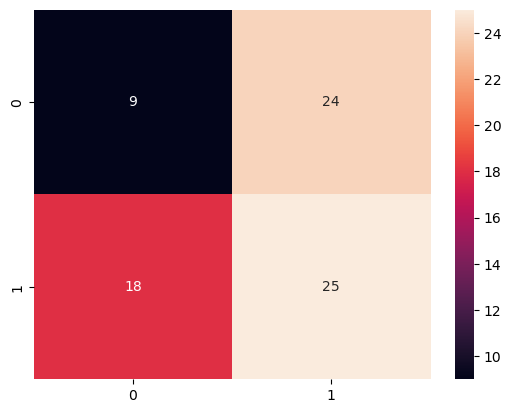

In [91]:
#Creating a heatmap of the confusion matrix
sns.heatmap(Cm, annot=True) 
plt.show()

24 and 34 are the correct classification made by the model which are True Positive and True Negative.

15 and 3 are misclassification made by our model the False Positve and Flase Negative.

In [92]:
# Importing necessary library
from sklearn.metrics import accuracy_score

In [93]:
#Checking for accuracy score
accuracy_score(y_test, pred)

0.4473684210526316

Test set accuracy score is 76%

In [94]:
#Importing metrics from sklearn
from sklearn import metrics

In [95]:
#checking the precision Of the positives predicted, what percentage is truly positive?
Precision = metrics.precision_score(y_test, pred)
Precision

0.5102040816326531

The true positive predicted is 69%

## Feature Selection 

In [96]:
#Importing ImportImportant  Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

The scikit-learn library offers the SelectKBest class, which is a powerful tool for feature selection based on various statistical tests. In the following example, we utilize the chi-squared (chi2) statistical test, designed for non-negative features, to carefully pick the top 13 features from our dataset.

In [97]:
#applying SelectKBest class to extract top best features

best_features = SelectKBest(score_func =chi2, k=10)

In [98]:
#Fit the bestfeatures object to the independent features (X) and the target variable (y):

Best_fit = best_features.fit(X, y)

In [99]:
#Calculate the chi-squared scores for each feature and store them in a dataframe CVD_scores:

CVD_scores = pd.DataFrame(Best_fit.scores_)

In [100]:
#Create another dataframe CVDcolumns to store the column (feature) names from the independent variables (X):

CVDcolumns= pd.DataFrame(X.columns)

In [101]:
#Concatenate the CVDcolumns and CVDscores dataframes horizontally to combine 
#them into a single dataframe feature_Scores for better visualization:

feature_score = pd.concat([CVDcolumns, CVD_scores], axis=1)

In [102]:
#Rename the columns of the featureScore dataframe to 'CVDS' (feature names) and 'Score' (feature scores):
feature_score.columns = ['CVDS', 'Score']

In [103]:
#Print the top 12 features with the highest scores using nlargest().
print(feature_score.nlargest(12, 'Score'))

        CVDS       Score
7    thalach  186.180286
9    oldpeak   71.692782
11        ca   71.020719
2         cp   62.116086
8      exang   38.518849
0        age   22.210517
4       chol   21.690747
3   trestbps   15.094591
10     slope    9.677715
1        sex    7.721690
12      thal    5.753030
6    restecg    2.877743


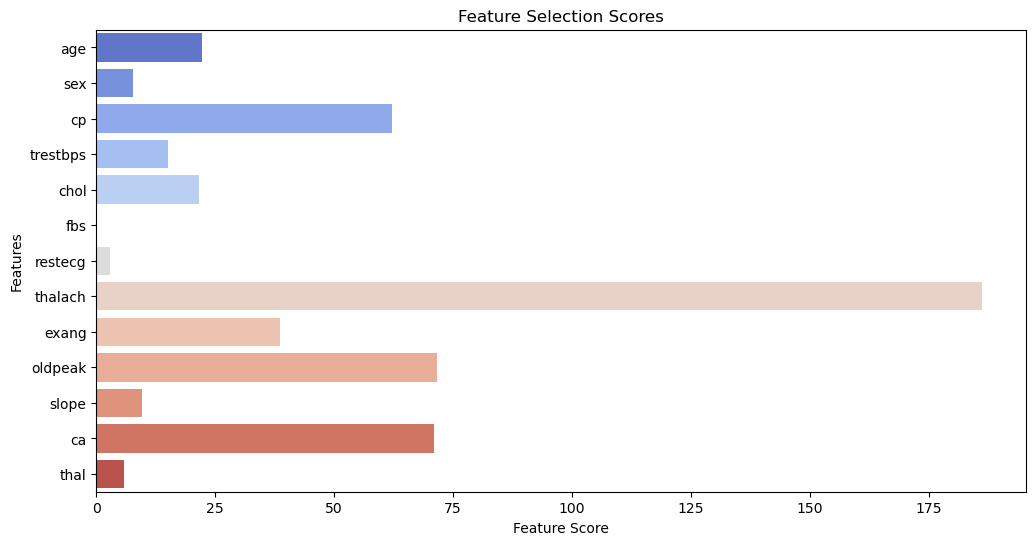

In [104]:
#: Adjust the figure size
plt.figure(figsize=(12, 6))

#Create the Seaborn bar plot
sns.barplot(data=feature_score, x='Score', y='CVDS',  orient='h', palette='coolwarm')

#Set labels and title
plt.xlabel('Feature Score')
plt.ylabel('Features')
plt.title('Feature Selection Scores')

plt.show()

We can infer from the scores above that the feature that has  high relationship  to the performer variable is thalach.

## Correlation Analysis

In [105]:
#Importing ImportImportant Libraries
import statsmodels.api as sm

In [106]:
# Calculate Pearson correlation coefficients with the target variable
correlations = CVD.corrwith(y)

In [107]:
# Sort features by their absolute correlation coefficients in descending order
sorted_indices = np.argsort(np.abs(correlations))

In [108]:
sorted_indices

age          5
sex          4
cp           6
trestbps     3
chol         0
fbs          1
restecg     12
thalach     10
exang       11
oldpeak      7
slope        9
ca           2
thal         8
target      13
dtype: int64

In [109]:
# Select the top k features based on correlation coefficients
k = 12
best_features_indices_corr = sorted_indices[:k]

In [110]:
# Extract the best features
best_features_corr = CVD.iloc[:, best_features_indices_corr]

In [111]:
# Add a constant term for the intercept
X = sm.add_constant(best_features_corr)

In [112]:
# Fit a logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.357650
         Iterations 7


### P_Value and Std Error Evaluation

In [113]:
#Extract p-values and standard errors for each feature
p_values = result.pvalues[1:]  # Exclude the constant term
std_errors = result.bse[1:]  # Exclude the constant term

In [114]:
reset = p_values.reset_index()

In [115]:
#Rename the columns
p_values = reset.rename(columns={'index':'Features', 0:'p_values'})
p_values

,Features,p_values
0,fbs,9.473690e-01
1,chol,2.163644e-01
2,restecg,2.277464e-01
3,trestbps,3.115583e-02
4,age,9.487552e-01
5,sex,1.522371e-04
6,thal,1.266097e-03
7,slope,6.727113e-02
8,ca,5.685412e-05
9,thalach,5.796469e-03


Feature Significance:

Features with p-values less than the significance level (0.05) are considered statistically significant.
Features with p-values greater than or equal to 0.05 are not considered statistically significant.

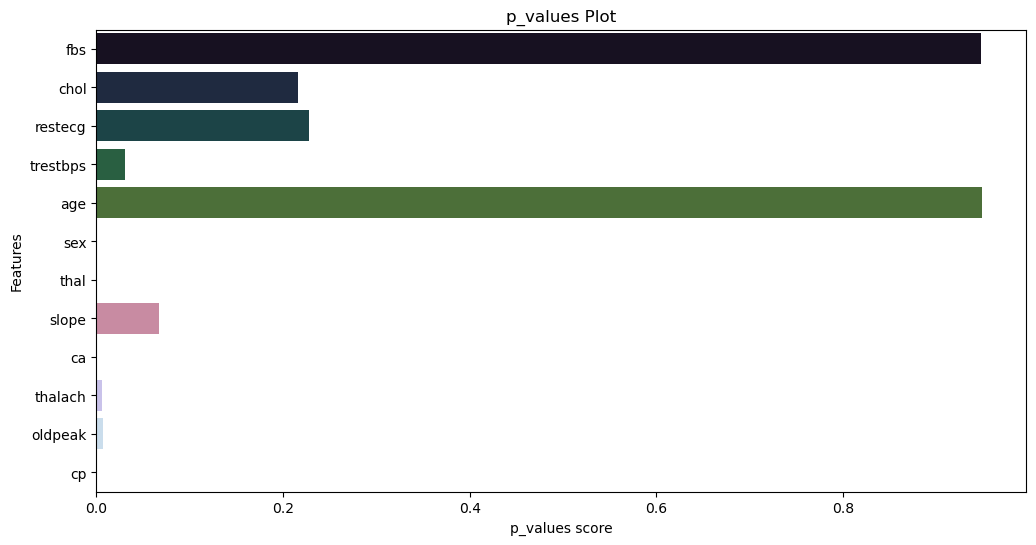

In [116]:
plt.figure(figsize=(12, 6))

#Create the Seaborn bar plot
sns.barplot(data=p_values, x='p_values', y='Features',  orient='h', palette='cubehelix')

#Set labels and title
plt.xlabel('p_values score')
plt.ylabel('Features')
plt.title('p_values Plot')

plt.show()


The following features are statistically significant (p < 0.05):
    
sex, thal, ca, thalach, oldpeak, cp.
These statistically significant features suggest that they have a significant relationship with the target variable in our dataset.

Non-Significant Features:

The following features are not statistically significant (p >= 0.05):
fbs, chol, restecg, trestbps, age, slope.
These non-significant features suggest that they may not have a strong or significant relationship with the target variable or outcome in our dataset.

In [117]:
std_error = std_errors.reset_index()
std_error

,index,0
0,fbs,0.516710
1,chol,0.003664
2,restecg,0.341325
3,trestbps,0.010306
4,age,0.022799
5,sex,0.452104
6,thal,0.286301
7,slope,0.344944
8,ca,0.201292
9,thalach,0.010168


Smaller standard errors indicate that the estimates of feature coefficients are likely to be more precise and reliable.
Larger standard errors suggest that the estimates of feature coefficients may be less precise and more variable.`

In [118]:
std_error_rename = std_error.rename(columns= {'index': 'features', 0:'std_error'})
std_error_rename    

,features,std_error
0,fbs,0.516710
1,chol,0.003664
2,restecg,0.341325
3,trestbps,0.010306
4,age,0.022799
5,sex,0.452104
6,thal,0.286301
7,slope,0.344944
8,ca,0.201292
9,thalach,0.010168


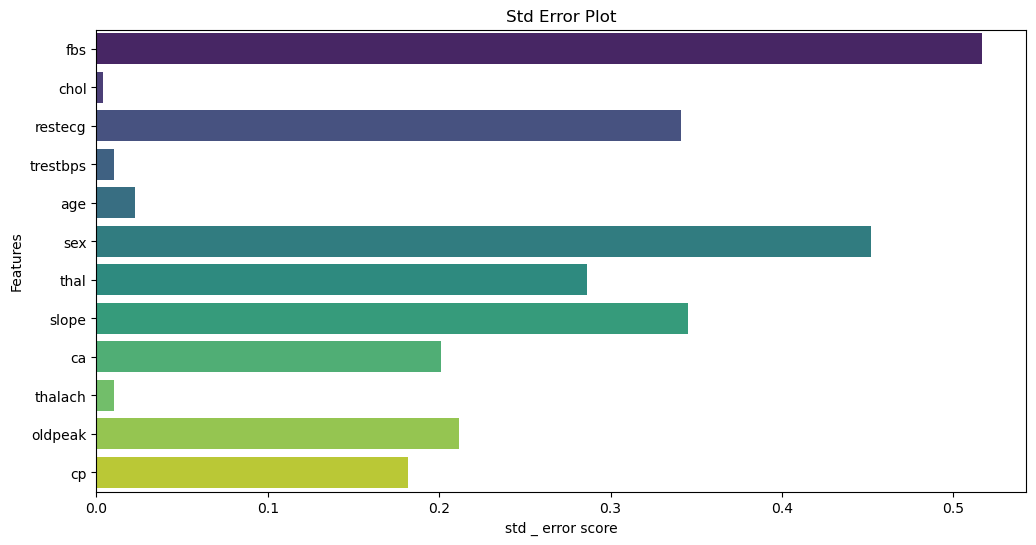

In [119]:
plt.figure(figsize=(12, 6))

#Create the Seaborn bar plot
sns.barplot(data=std_error_rename, x='std_error', y='features',  orient='h', palette='viridis')

#Set labels and title
plt.xlabel('std _ error score')
plt.ylabel('Features')
plt.title('Std Error Plot')

plt.show()

Inference:

Features with smaller standard errors (e.g., trestbps, thalach, oldpeak, cp, ca, chol, age) are associated with more precise and reliable coefficient estimates in the regression model. This implies that changes in these features have a well-defined and stable impact on the target variable.
Features with larger standard errors (e.g., fbs, sex, restecg, thal, slope) are associated with less precise coefficient estimates. This suggests that changes in these features may have more variability in their impact on the target variable and should be interpreted with caution.

### FEATURE IMPORTANCE

In [120]:
#Importing ExtraTreesClassifier Module
from sklearn.ensemble import ExtraTreesClassifier

In [121]:
#Creating IDV and DV

data = CVD.copy()

X = CVD.iloc[:,0:13] #Independent Varaibles
y = CVD.iloc[:,-1] #Dependent variable

In [122]:
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

[0.07088968 0.0580147  0.13084677 0.06318803 0.05795541 0.02035837
 0.03358068 0.08337471 0.0969526  0.08488606 0.07363326 0.12484412
 0.10147563]


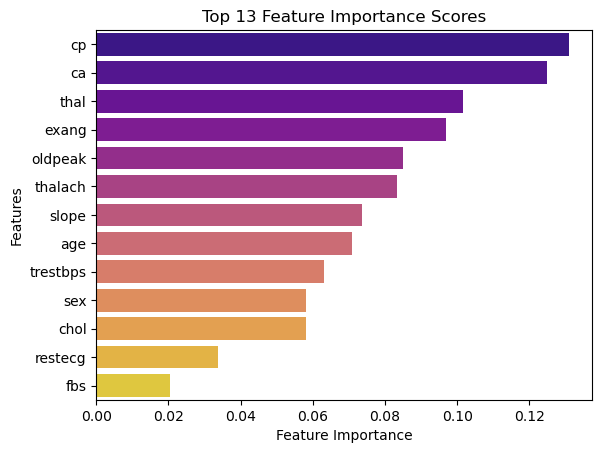

In [123]:
##plot graph of feature importances for better visualization
featImportance = pd.Series(model.feature_importances_, index= X.columns)

# # Select the top 13 features
top_features=featImportance.nlargest(13)

# Create a custom color palette
custom_palette = sns.color_palette("plasma", len(top_features)) 

#create the Seaborn horizontal bar plot and apply the custom palette
sns.barplot(x=top_features, y=top_features.index, palette=custom_palette)


#Set labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 13 Feature Importance Scores')

plt.show()

Feature importance scores are typically relative to each other within the same model. Higher scores indicate a feature's greater importance relative to other features in the model, such as cp, ca, exang, thal, oldpeak,thalach etc.

### RANDOM FOREST CLASSIFIER MODEL

In [124]:
#Importing the Library
from sklearn.ensemble import RandomForestClassifier

In [125]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [126]:
#Employing the Model
Rclf = RandomForestClassifier(criterion='gini',
                              max_depth =7,
                              n_estimators=100,
                              random_state=5)

In [127]:
#fitting model to dataset
Rclf.fit(X_train, y_train).score(X_train, y_train)

0.9911504424778761

The Random forest training accuracy score is 99%

In [128]:
#Making prediction
y_pred = Rclf.predict(X_test)

In [129]:
#importing confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
cm =confusion_matrix(y_test, y_pred)
cm 

array([[25,  8],
       [ 3, 40]], dtype=int64)

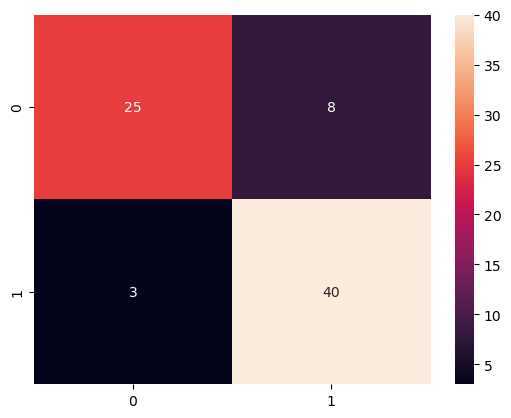

In [131]:
#Creating a heatmap of the confusion matrix
sns.heatmap(cm, annot=True) 
plt.show()

The model correctly classified instances as True Positives and True Negatives, specifically with numbers 26 and 39.

Additionally, our model made misclassifications, consisting of False Positives and False Negatives, represented by numbers 7 and 4, respectively.

In [132]:
#Importing accuracy score
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_test, y_pred)

0.8552631578947368

The test accuracy score is 85%